In [1]:
import pandas as pd
from datetime import datetime, timedelta

In [2]:
data = pd.read_csv("2023-11-06.csv", parse_dates=["timestamp"])
data.head(5)


,timestamp,app_name,minutes_away
0,2023-11-06 07:45:41,Feed | LinkedIn — Mozilla Firefox,0
1,2023-11-06 07:45:56,Feed | LinkedIn — Mozilla Firefox,0
2,2023-11-06 07:46:11,Feed | LinkedIn — Mozilla Firefox,0
3,2023-11-06 07:46:27,Feed | LinkedIn — Mozilla Firefox,0
4,2023-11-06 07:46:42,Feed | LinkedIn — Mozilla Firefox,0


In [3]:
data['name'] = data['app_name'].map(lambda x: x.split(' — ')[-1].split(' - ')[-1])
data.columns = ['timestamp', 'window_title', 'minutes_away', 'app_name']
data = data.sort_values(['app_name', 'timestamp'])
data.head(5)

,timestamp,window_title,minutes_away,app_name
1511,2023-11-06 17:50:49,.ipynb_checkpoints,0,.ipynb_checkpoints
1466,2023-11-06 17:48:17,"1,275 items recycled",0,"1,275 items recycled"
1467,2023-11-06 17:48:17,"1,360 items recycled",0,"1,360 items recycled"
1464,2023-11-06 17:48:17,49% complete,0,49% complete
1463,2023-11-06 17:48:17,680 items recycled,0,680 items recycled


In [15]:
total_usage = data.copy()
last_timestamp = timedelta(seconds=0)
last_app_name = "x"
total_delta = timedelta(seconds=0)


def sum_times(row):
    global last_timestamp, last_app_name, total_delta
    if (str(last_timestamp) == "0:00:00") or (row["app_name"] != last_app_name):
        last_timestamp = row["timestamp"]
        last_app_name = row["app_name"]
        total_delta = timedelta(seconds=0)
        return timedelta(seconds=0)

    elif (row["timestamp"] - last_timestamp) < timedelta(seconds=40):
        delta = row["timestamp"] - last_timestamp
        total_delta += delta
        return total_delta

    else:
        last_timestamp = row["timestamp"]
        return total_delta


total_usage["daily_usage"] = data.apply(sum_times, axis=1)
# total_usage.head(5)

total_usage = (
    total_usage.groupby("app_name")["daily_usage"].max().sort_values(ascending=False)
)
total_usage.head(5)
total_usage = total_usage.to_frame()
total_usage = total_usage.reset_index()

In [5]:
import matplotlib.pyplot as plt
import numpy as np


In [16]:

total_usage['daily_usage'] = (total_usage['daily_usage'] / np.timedelta64(1, 'h'))
# total_usage.to_csv('usage_time.csv')
total_usage


,app_name,daily_usage
0,Mozilla Firefox,3.918056
1,Visual Studio Code,2.951944
2,tk,0.173889
3,Untitled,0.058611
4,Python Dados,0.050278
...,...,...
61,Live at the Royal Albert Hall,0.000000
62,Modulo 3,0.000000
63,Modulo 5,0.000000
64,"1,275 items recycled",0.000000


Index(['Mozilla Firefox', 'Visual Studio Code', 'tk', 'Untitled',
       'Python Dados'],
      dtype='object', name='app_name')
[[3.91805556]
 [2.95194444]
 [0.17388889]
 [0.05861111]
 [0.05027778]]


<BarContainer object of 5 artists>

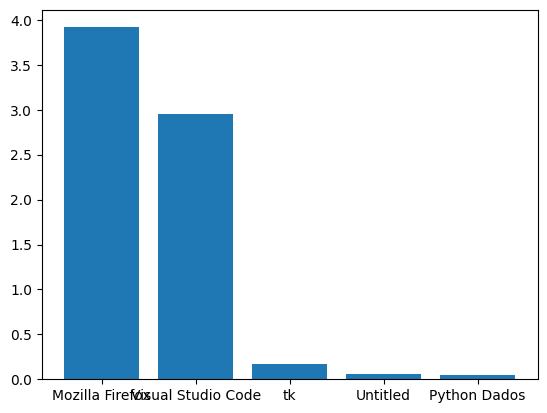

In [ ]:
print(total_usage.index)
print(total_usage.values)
values_to_plot = total_usage.values[:, 0]

fig, ax = plt.subplots()
ax.bar(total_usage.index, values_to_plot)

In [ ]:
import os

In [ ]:
files = os.listdir()
filtered = [file for file in files if file.endswith('.csv')]
filtered

['2023-11-03.csv',
 '2023-11-04.csv',
 '2023-11-05.csv',
 '2023-11-06.csv',
 'usage_time.csv']

In [ ]:
filename = 'usage_time.csv'
print(f'{os.getcwd()}\{filename}')

e:\DEV\Python\PyWindows\logs\usage_time.csv
